In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import chardet

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
import numpy as np



In [83]:
file_path = 'E:\SWJP\EDA_Model\Model_test_data\DOE.csv' 
data = pd.read_csv(file_path, encoding='ISO-8859-1')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Turjo\AppData\Local\Temp\ipykernel_31072\1291530428.py:1: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'E:\SWJP\EDA_Model\Model_test_data\DOE.csv'


In [84]:

with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())
    detected_encoding = result['encoding']

In [85]:
data = pd.read_csv(file_path, encoding=detected_encoding)


In [86]:
data['EC(µS/cm)'] = pd.to_numeric(data['EC(µS/cm)'], errors='coerce')

In [87]:
data.fillna(data.mean(numeric_only=True), inplace=True)


In [88]:
data

,Year,Sample Location,Lab code,Date,Temp,PH,EC(µS/cm),TS(mg/l),TDS(mg/l),SS(mg/l),DO(mg/l),Salinity(%)
0,2017,"Karnafully River CUFL side Anowara, Ctg.",403,5/1/2017,22.2,8.10,20450.0,10414.0,10228.0,186,5.60,14.200000
1,2017,"Karnafully River TSP Side, Patenga, Ctg.",404,5/1/2017,22.2,7.90,19984.0,10190.0,9992.0,198,6.10,13.800000
2,2017,"Karnafully River CUFL side Anowara, Ctg.",437,5/2/2017,21.1,7.30,22580.0,11494.0,11292.0,202,4.80,14.800000
3,2017,"Karnafully River TSP Side, Patenga, Ctg.",438,5/2/2017,21.1,7.90,21356.0,10906.0,10678.0,228,5.40,13.600000
4,2017,"Karnafully River TSP Side, Patenga, Ctg.",471,7/3/2017,25.6,7.30,26330.0,13476.0,13168.0,308,6.10,17.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
213,2022,TSP Side,1349,NaN,23.0,7.53,19110.0,11518.0,11480.0,38,7.40,6.847517
214,2022,Shikalbaha,1350,NaN,23.5,7.18,538.0,278.0,189.0,89,7.38,6.847517
215,2022,Kalurghat Bridge,1351,NaN,23.5,7.21,459.0,365.0,286.0,79,7.77,6.847517
216,2022,Mariam Nagar,1352,NaN,22.5,7.41,358.0,380.0,318.0,62,7.28,6.847517


In [89]:
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams["figure.figsize"] = (12, 8)

C:\Users\Turjo\AppData\Local\Temp\ipykernel_31072\608980420.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Year", y="Temp", data=data, ci=None, edgecolor="black",linewidth=2)


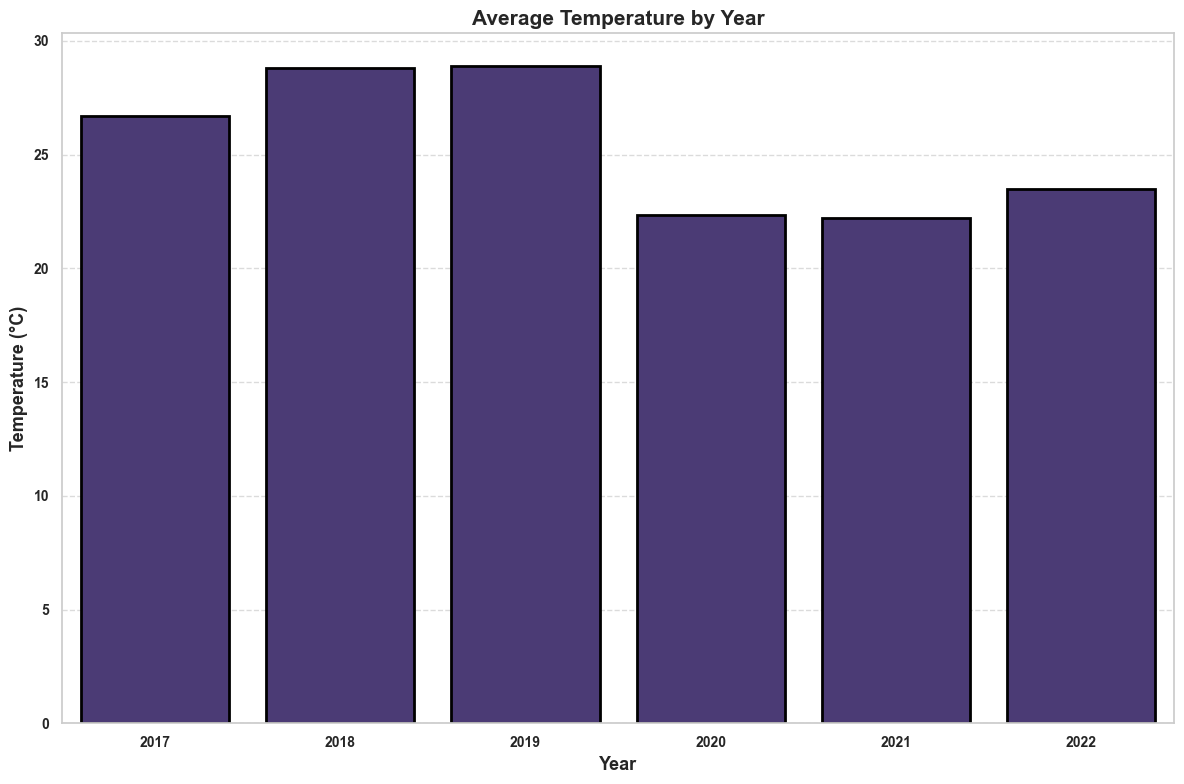

In [90]:
plt.figure()
sns.barplot(x="Year", y="Temp", data=data, ci=None, edgecolor="black",linewidth=2)
plt.title("Average Temperature by Year", fontsize=15, fontweight="bold")
plt.ylabel("Temperature (°C)", fontsize=13, fontweight="bold")
plt.xlabel("Year", fontsize=13, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


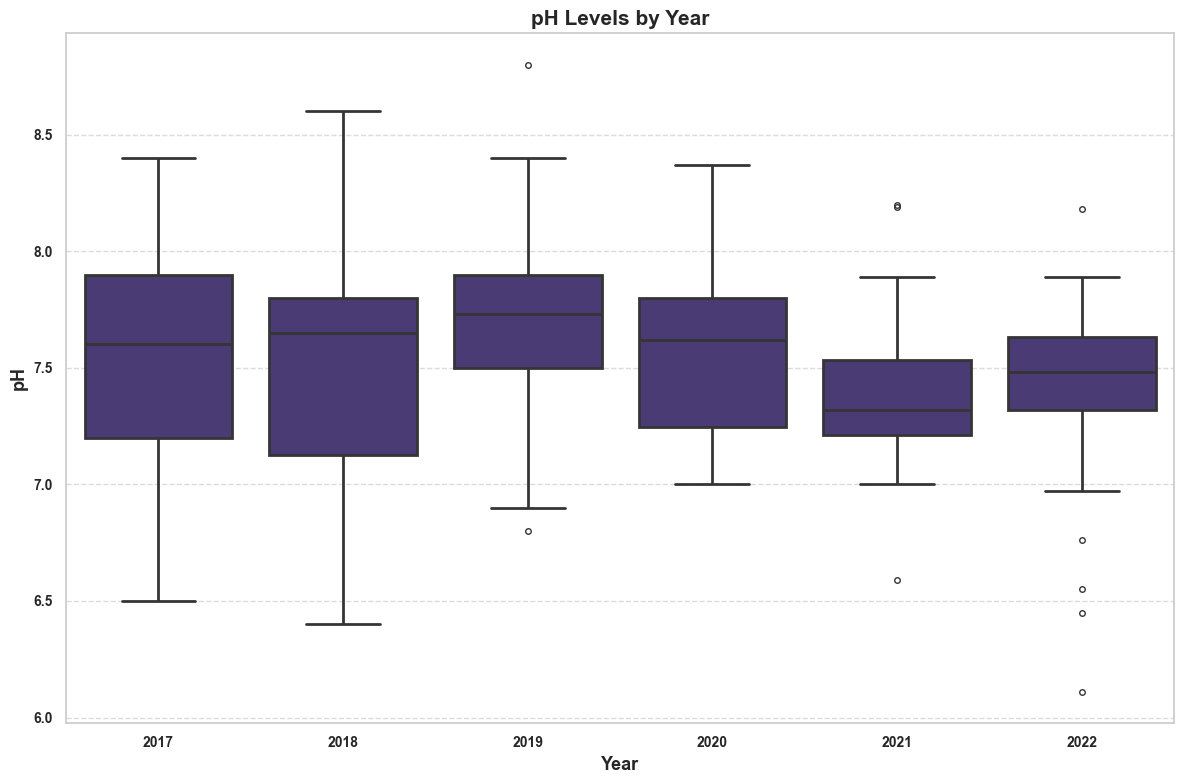

In [91]:
# Box Plot: pH Levels by Year with enhanced visuals
plt.figure()
sns.boxplot(x="Year", y="PH", data=data, linewidth=2, width=0.8, fliersize=4)
plt.title("pH Levels by Year", fontsize=15, fontweight="bold")
plt.ylabel("pH", fontsize=13, fontweight="bold")
plt.xlabel("Year", fontsize=13, fontweight="bold")

# Customize ticks
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


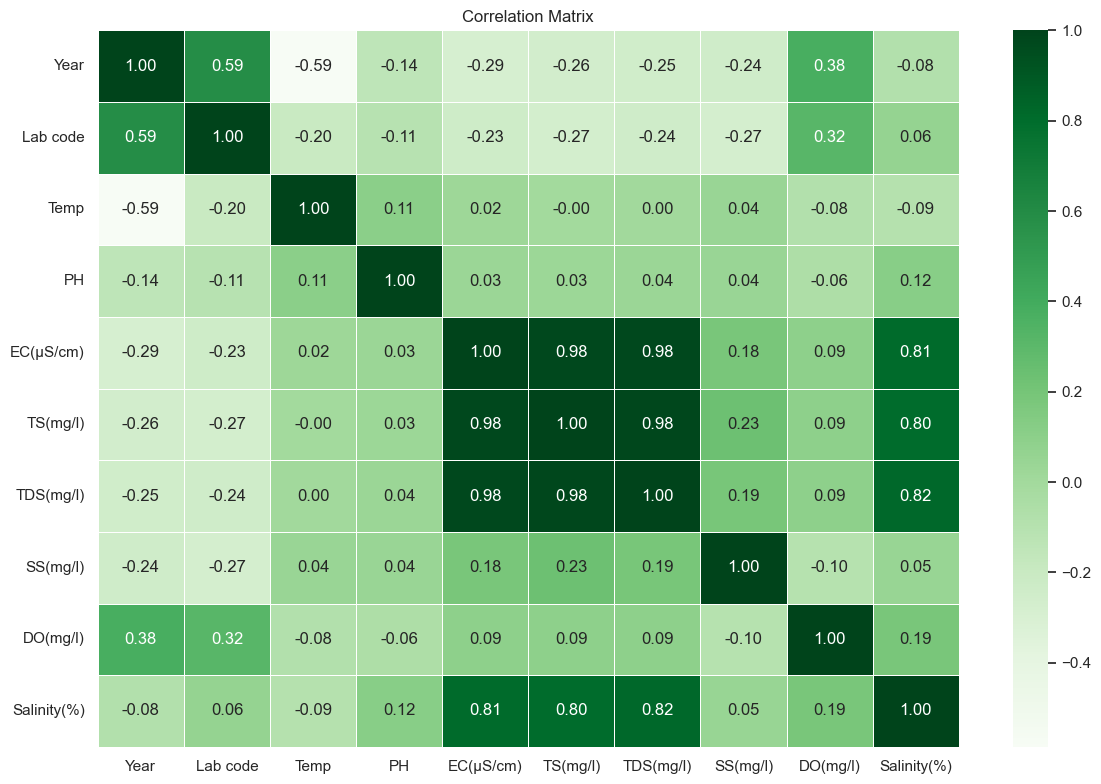

In [ ]:
numeric_data = data.select_dtypes(include=["number"])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Greens", linewidths=0.5)
plt.title("Fig-8 (Correlation Matrix)")
plt.tight_layout()
plt.show()


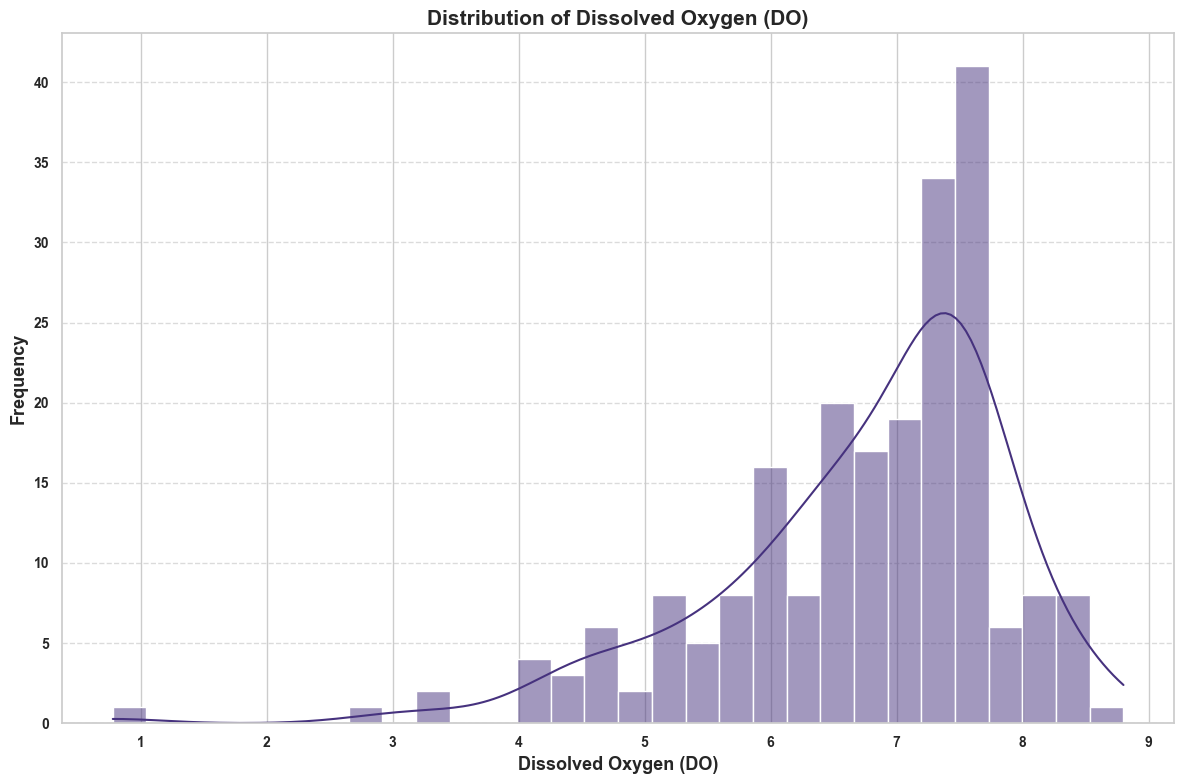

In [93]:
plt.figure()
sns.histplot(data['DO(mg/l)'], kde=True, bins=30)
plt.title("Distribution of Dissolved Oxygen (DO)", fontsize=15, fontweight="bold")
plt.xlabel("Dissolved Oxygen (DO)", fontsize=13, fontweight="bold")
plt.ylabel("Frequency", fontsize=13, fontweight="bold")
plt.xticks(fontsize=10, fontweight="bold")
plt.yticks(fontsize=10, fontweight="bold")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [94]:
data['EC(µS/cm)'] = pd.to_numeric(data['EC(µS/cm)'], errors='coerce')
data.fillna(data.mean(numeric_only=True), inplace=True)

In [95]:
X = data.drop(columns=['DO(mg/l)', 'Sample Location', 'Lab code', 'Date'], errors='ignore')
y = data['DO(mg/l)']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [98]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

In [99]:

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {
        'MSE': mse,
        'RMSE': rmse,
    }

results_df = pd.DataFrame(results).T
results_df

,MSE,RMSE
Linear Regression,1.005038,1.002516
Random Forest,0.696872,0.834788
Gradient Boosting,0.767140,0.875865
Support Vector Regression,0.731391,0.855214
K-Nearest Neighbors,0.611069,0.781709
